In [7]:
# !git clone https://github.com/TOnodera/review-deep-learning.git
!ls /content/review-deep-learning/


ch01  common  dataset  Dockerfile  env.test.ipynb  requirements.txt


Epoch 1, Loss: 1.1256062166823237
Epoch 2, Loss: 1.1255632260656587
Epoch 3, Loss: 1.1224626091142815
Epoch 4, Loss: 1.120918633796049
Epoch 5, Loss: 1.1191949092958782
Epoch 6, Loss: 1.1224064214816991
Epoch 7, Loss: 1.127647816742461
Epoch 8, Loss: 1.1252707914374427
Epoch 9, Loss: 1.1243885443546662
Epoch 10, Loss: 1.124829267041892
Epoch 11, Loss: 1.124103316304937
Epoch 12, Loss: 1.1227896048713435
Epoch 13, Loss: 1.120083859885082
Epoch 14, Loss: 1.1169836832205715
Epoch 15, Loss: 1.112133949245536
Epoch 16, Loss: 1.1072867188323008
Epoch 17, Loss: 1.0984635708988946
Epoch 18, Loss: 1.0884592236871753
Epoch 19, Loss: 1.0798113229468613
Epoch 20, Loss: 1.0692464521820642
Epoch 21, Loss: 1.0587766546869257
Epoch 22, Loss: 1.0477942121638297
Epoch 23, Loss: 1.0366919190756536
Epoch 24, Loss: 1.0261074490849436
Epoch 25, Loss: 1.0180048792776883
Epoch 26, Loss: 1.008676128543063
Epoch 27, Loss: 0.9993098187333117
Epoch 28, Loss: 0.9909229450177859
Epoch 29, Loss: 0.9837700816875814
E

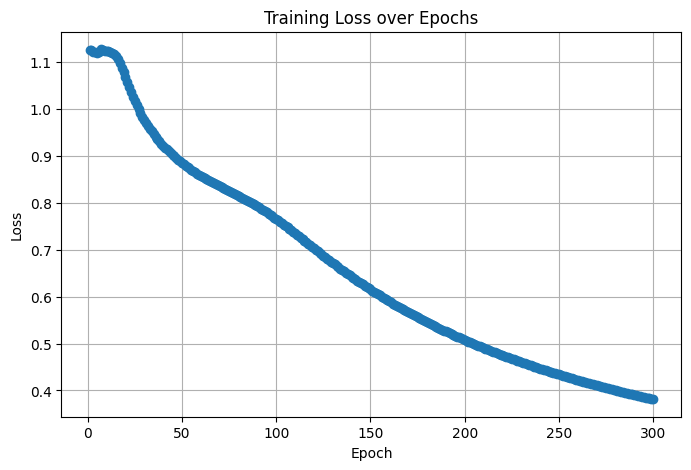

In [9]:
import sys
sys.path.append("/content/review-deep-learning/ch01")
import numpy as np
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayerNet
import matplotlib.pyplot as plt


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# データの読み込み、モデルとオプティマイザーの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []


for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters * batch_size : (iters + 1) * batch_size]
        batch_t = t[iters * batch_size : (iters + 1) * batch_size]

        # 勾配を求めてパラメーターを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        # 損失の記録
        total_loss += loss
        loss_count += 1

# グラフ描画
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_epoch + 1), loss_list, marker="o")
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()
